In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.fft import fft, fftfreq
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

# Define colors for activities
activity_colors = {
    'standing': '#1f77b4',
    'walking': '#ff7f0e',
    'jumping': '#2ca02c',
    'still': '#d62728'
}

In [ ]:
features_df = pd.read_csv('/Data/extracted_datasets/extracted_features.csv')
test_data =  pd.read_csv('extracted_test_features.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/Data/extracted_features.csv'

In [58]:
features_df.head()

,acc_x_mean,acc_x_std,acc_x_var,acc_x_min,acc_x_max,acc_x_range,acc_x_median,acc_x_mad,acc_x_rms,acc_x_skewness,...,gyr_sma,gyr_smv,gyr_corr_xy,gyr_corr_xz,gyr_corr_yz,activity,subject,session,window_id,source_file
0,0.192972,0.192863,0.037196,-0.495746,0.449528,0.945274,0.218121,0.114050,0.272827,-1.268229,...,0.313703,0.205450,-0.563543,-0.166633,-0.194811,standing2,Jean,2,0,combined_train_data_wide.csv
1,0.130448,0.110917,0.012303,-0.107177,0.310913,0.418090,0.149196,0.083772,0.171229,-0.422248,...,0.268134,0.173778,-0.504231,-0.027873,-0.460709,standing2,Jean,2,1,combined_train_data_wide.csv
2,0.091788,0.118491,0.014040,-0.107177,0.321962,0.429139,0.077621,0.093758,0.149884,0.329404,...,0.175731,0.115113,-0.227269,-0.183002,-0.172011,standing2,Jean,2,2,combined_train_data_wide.csv
3,0.038348,0.096451,0.009303,-0.116963,0.321962,0.438925,0.023643,0.062383,0.103795,0.963359,...,0.155097,0.103740,-0.457841,-0.111434,-0.076926,standing2,Jean,2,3,combined_train_data_wide.csv
4,0.029360,0.102661,0.010539,-0.153130,0.229175,0.382305,0.033409,0.084361,0.106777,0.111862,...,0.136463,0.090295,-0.578205,-0.175699,-0.371998,standing2,Jean,2,4,combined_train_data_wide.csv


In [59]:
print(features_df.shape, test_data.shape) # train_data.shape, test_data.shape

(1208, 123) (367, 123)


In [60]:
print(features_df.columns.tolist)

<bound method IndexOpsMixin.tolist of Index(['acc_x_mean', 'acc_x_std', 'acc_x_var', 'acc_x_min', 'acc_x_max',
       'acc_x_range', 'acc_x_median', 'acc_x_mad', 'acc_x_rms',
       'acc_x_skewness',
       ...
       'gyr_sma', 'gyr_smv', 'gyr_corr_xy', 'gyr_corr_xz', 'gyr_corr_yz',
       'activity', 'subject', 'session', 'window_id', 'source_file'],
      dtype='object', length=123)>


In [61]:
features_df.drop(columns=['source_file'], inplace=True), test_data.drop(columns=['source_file'], inplace=True)

(None, None)

In [62]:
test_data.head(5)

,acc_x_mean,acc_x_std,acc_x_var,acc_x_min,acc_x_max,acc_x_range,acc_x_median,acc_x_mad,acc_x_rms,acc_x_skewness,...,acc_corr_yz,gyr_sma,gyr_smv,gyr_corr_xy,gyr_corr_xz,gyr_corr_yz,activity,subject,session,window_id
0,-0.015123,0.085285,0.007274,-0.171210,0.172360,0.343570,-0.014965,0.065722,0.086615,-0.132085,...,-0.323340,0.082009,0.056786,0.158072,0.238277,0.052802,standing8,Jean,8,0
1,0.009499,0.086401,0.007465,-0.208689,0.138782,0.347472,0.036865,0.053930,0.086922,-0.791803,...,-0.320594,0.071908,0.049370,-0.131949,0.031749,-0.080576,standing8,Jean,8,1
2,0.009138,0.075390,0.005684,-0.208689,0.138782,0.347472,0.004663,0.043718,0.075942,-0.817064,...,-0.301966,0.068318,0.044225,0.591124,0.227265,0.059238,standing8,Jean,8,2
3,-0.006388,0.051174,0.002619,-0.108277,0.110761,0.219037,0.000689,0.034623,0.051572,-0.017052,...,-0.162716,0.078880,0.051618,0.529714,0.302380,-0.073445,standing8,Jean,8,3
4,-0.025488,0.057760,0.003336,-0.108277,0.094240,0.202517,-0.022584,0.049552,0.063134,0.405779,...,0.115740,0.082356,0.054698,-0.061533,0.517865,-0.175328,standing8,Jean,8,4


In [63]:
features_df.isnull().sum()

acc_x_mean     0
acc_x_std      0
acc_x_var      0
acc_x_min      0
acc_x_max      0
              ..
gyr_corr_yz    0
activity       0
subject        0
session        0
window_id      0
Length: 122, dtype: int64

In [64]:
numeric_features = features_df.select_dtypes(include=[np.number]).columns
print(features_df[numeric_features[:10]].describe())

print("\n3.5 Activities in Features:")
feature_activity_counts = features_df['activity'].value_counts().sort_index()
print(feature_activity_counts)

        acc_x_mean    acc_x_std    acc_x_var    acc_x_min    acc_x_max  \
count  1208.000000  1208.000000  1208.000000  1208.000000  1208.000000   
mean      0.031742     0.579105     1.289630    -1.376552     1.071414   
std       0.353596     0.977271     4.170029     2.871378     1.725160   
min      -1.948673     0.002905     0.000008   -20.833050    -0.467043   
25%      -0.016338     0.034056     0.001160    -1.265928     0.035139   
50%       0.004098     0.131501     0.017293    -0.208070     0.271146   
75%       0.092852     0.610927     0.373232    -0.036212     1.373382   
max       1.932391     5.993217    35.918653     0.957016    15.832397   

       acc_x_range  acc_x_median    acc_x_mad    acc_x_rms  acc_x_skewness  
count  1208.000000   1208.000000  1208.000000  1208.000000     1208.000000  
mean      2.447966      0.104371     0.316787     0.643081       -0.110998  
std       4.260643      0.421417     0.487861     1.001420        0.651051  
min       0.012323     -1

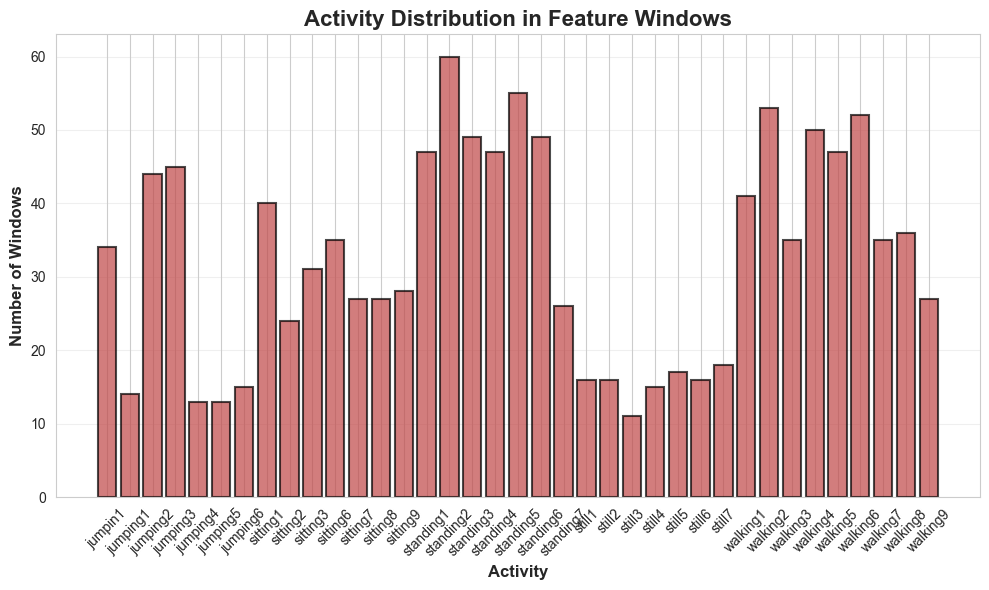

In [65]:
plt.figure(figsize=(10, 6))
colors_list = [activity_colors.get(act.lower(), "#C04646") for act in feature_activity_counts.index]
bars = plt.bar(feature_activity_counts.index, feature_activity_counts.values, 
               color=colors_list, alpha=0.7, edgecolor='black', linewidth=1.5)
plt.title('Activity Distribution in Feature Windows', fontsize=16, fontweight='bold')
plt.xlabel('Activity', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Number of Windows', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')


plt.tight_layout()
plt.show()


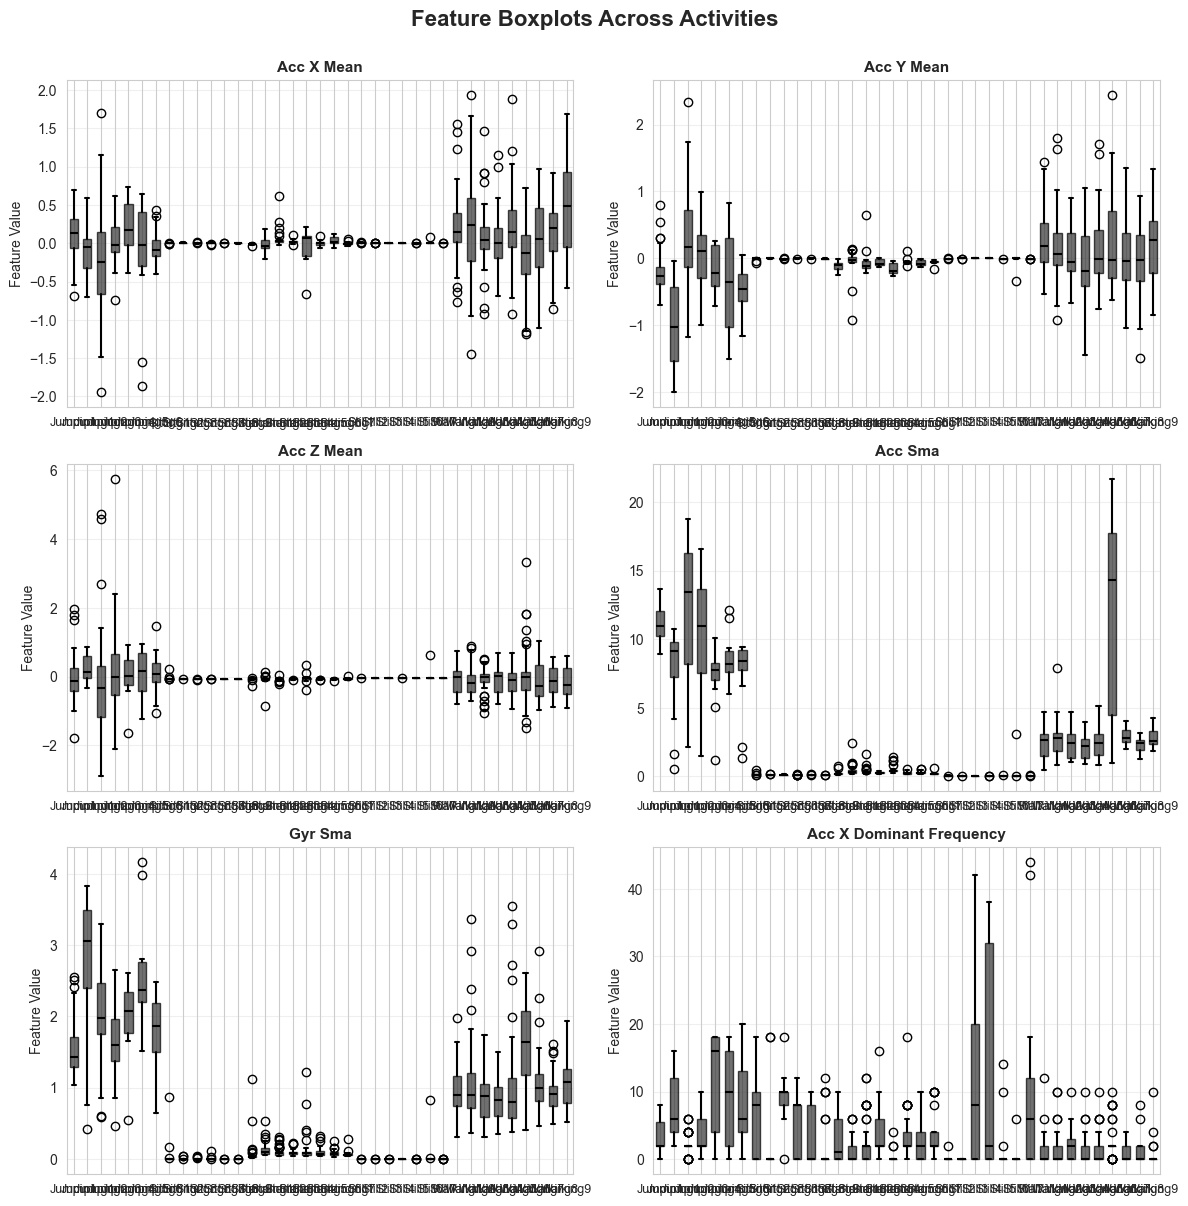

In [66]:
# Select features for boxplots
boxplot_features = [
    'acc_x_mean', 'acc_y_mean', 'acc_z_mean',
    'acc_sma', 'gyr_sma', 'acc_x_dominant_frequency'
]
boxplot_features = [f for f in boxplot_features if f in features_df.columns]

n_cols = 2
n_rows = (len(boxplot_features) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if isinstance(axes, plt.Axes) else axes

for idx, feature in enumerate(boxplot_features):
    ax = axes[idx]
    
    data_to_plot = []
    labels = []
    colors_list = []
    
    for activity in sorted(features_df['activity'].unique()):
        activity_data = features_df[features_df['activity'] == activity][feature]
        data_to_plot.append(activity_data)
        labels.append(activity.capitalize())
        colors_list.append(activity_colors.get(activity.lower(), '#333333'))
    
    bp = ax.boxplot(data_to_plot, labels=labels, patch_artist=True, widths=0.6)
    
    for patch, color in zip(bp['boxes'], colors_list):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    for element in ['whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color='black', linewidth=1.5)
    
    ax.set_title(feature.replace('_', ' ').title(), fontweight='bold', fontsize=11)
    ax.set_ylabel('Feature Value', fontsize=10)
    ax.grid(True, alpha=0.3, axis='y')
    ax.tick_params(axis='x', labelsize=9)

# Hide unused subplots
for idx in range(len(boxplot_features), len(axes)):
    axes[idx].axis('off')

plt.suptitle('Feature Boxplots Across Activities', fontsize=16, fontweight='bold', y=1.001)
plt.tight_layout()
plt.show()


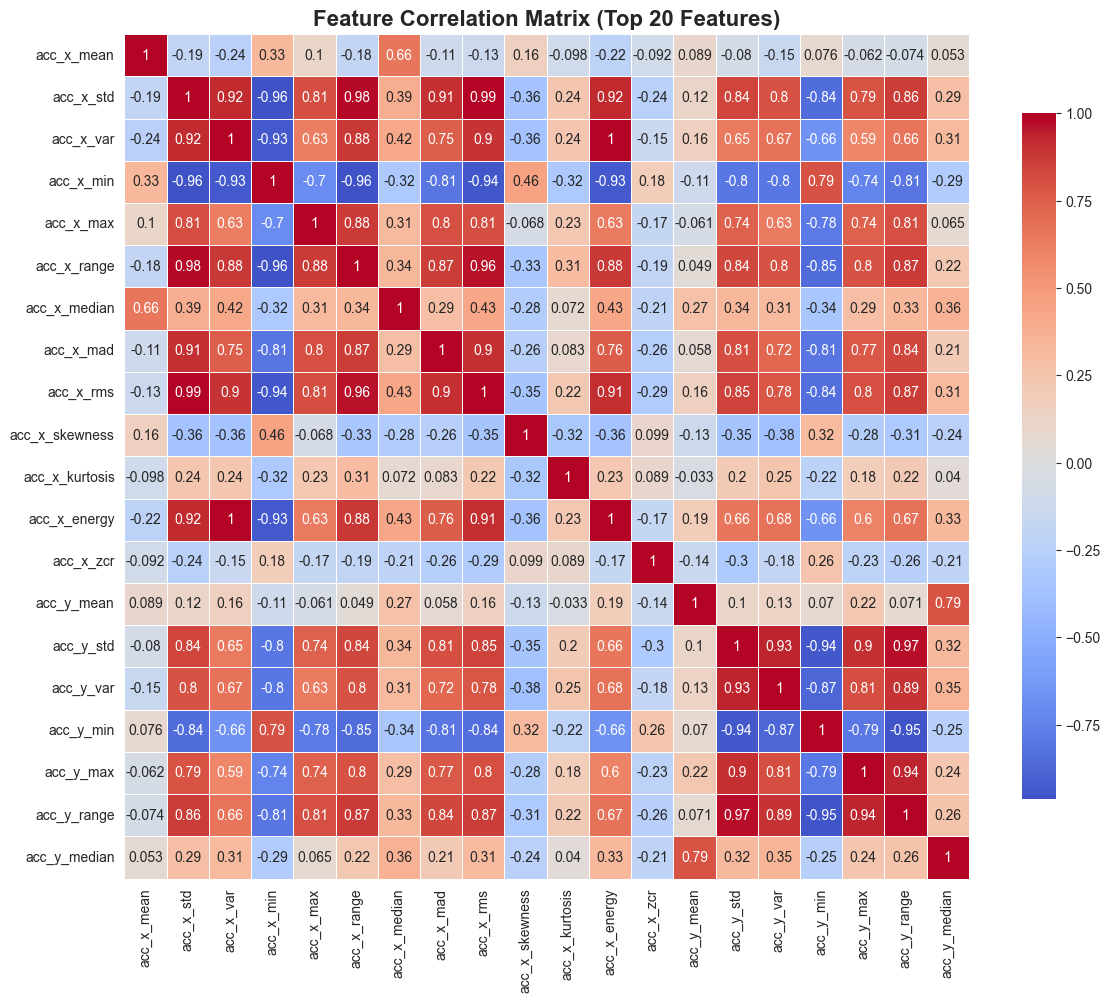

In [67]:
# Select numeric columns
numeric_cols = features_df.select_dtypes(include=[np.number]).columns
exclude_cols = ['window_id', 'session']
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

# Limit to top features for clearer visualization
top_n = 20
if len(numeric_cols) > top_n:
    numeric_cols = numeric_cols[:top_n]

# Calculate correlation matrix
corr_matrix = features_df[numeric_cols].corr()

# Plot
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, 
           annot=True, 
           cmap='coolwarm', 
           center=0,
           square=True, 
           linewidths=0.5, 
           cbar_kws={"shrink": 0.8})

plt.title('Feature Correlation Matrix (Top 20 Features)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

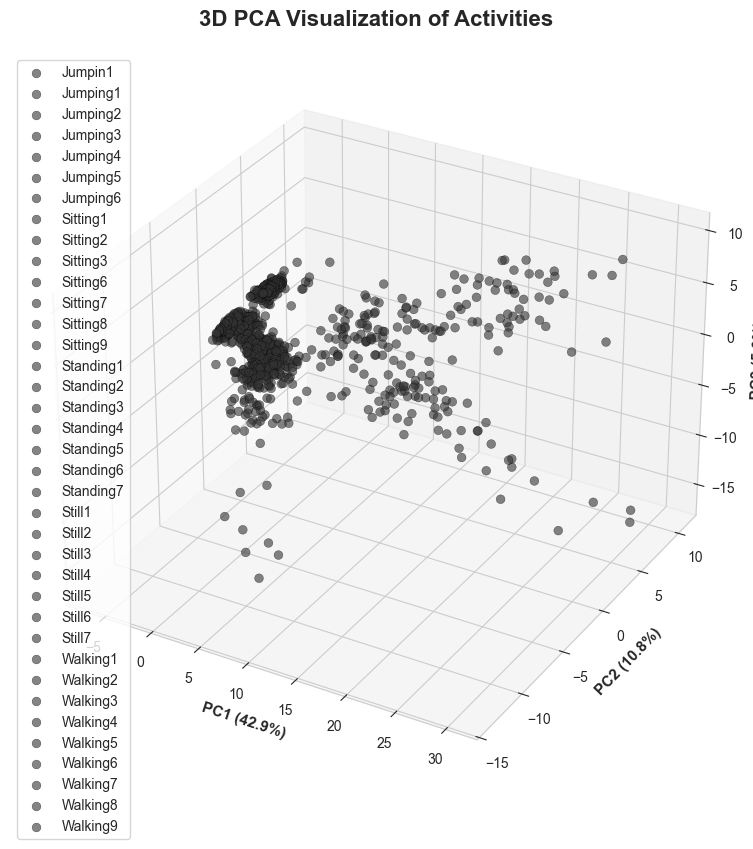

In [75]:

numeric_cols = features_df.select_dtypes(include=[np.number]).columns
exclude_cols = ['window_id', 'session']
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

X = features_df[numeric_cols].fillna(0).values
y = features_df['activity'].values

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
# Apply PCA with 3 components
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Create 3D plot
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

for activity in sorted(set(y)):
    mask = y == activity
    color = activity_colors.get(activity.lower(), '#333333')
    ax.scatter(X_pca_3d[mask, 0], 
              X_pca_3d[mask, 1], 
              X_pca_3d[mask, 2],
              label=activity.capitalize(), 
              alpha=0.6, 
              color=color, 
              s=40, 
              edgecolors='black', 
              linewidth=0.3)

ax.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.1%})', 
             fontsize=11, fontweight='bold')
ax.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.1%})', 
             fontsize=11, fontweight='bold')
ax.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.1%})', 
             fontsize=11, fontweight='bold')
ax.set_title('3D PCA Visualization of Activities', fontsize=16, fontweight='bold', pad=20)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
